In [2]:
import urllib.request
import io
import zipfile
import matplotlib.pyplot as plt
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity

In [20]:
G = nx.read_gml('dol.gml', label = 'id')

In [21]:
# print degree for each team - number of games
for n, d in G.degree():
 print(f"{n:20} |{d:2}|")

                   0 | 6|
                   1 | 8|
                   2 | 4|
                   3 | 3|
                   4 | 1|
                   5 | 4|
                   6 | 6|
                   7 | 5|
                   8 | 6|
                   9 | 7|
                  10 | 5|
                  11 | 1|
                  12 | 1|
                  13 | 8|
                  14 |12|
                  15 | 7|
                  16 | 6|
                  17 | 9|
                  18 | 7|
                  19 | 4|
                  20 | 9|
                  21 | 6|
                  22 | 1|
                  23 | 3|
                  24 | 6|
                  25 | 3|
                  26 | 3|
                  27 | 5|
                  28 | 5|
                  29 | 9|
                  30 | 5|
                  31 | 1|
                  32 | 3|
                  33 |10|
                  34 | 5|
                  35 | 1|
                  36 | 7|
                  37 |11|
            

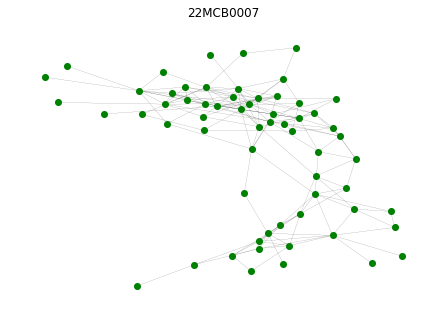

In [23]:
options = {"node_color": "green", "node_size": 50, "linewidths": 0, "width": 0.1}
pos = nx.spring_layout(G, seed=1969) # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.title('22MCB0007')
plt.show()

In [24]:
list(nx.find_cliques(G))

[[1, 36],
 [1, 17, 27],
 [1, 54, 41],
 [1, 54, 19],
 [1, 26, 27],
 [1, 28],
 [2, 10, 42],
 [2, 44],
 [2, 61],
 [4, 51],
 [5, 56],
 [5, 9, 57, 13],
 [6, 56],
 [6, 13, 57, 9, 17],
 [6, 13, 57, 54],
 [7, 40],
 [7, 27],
 [7, 19, 54],
 [7, 19, 30],
 [8, 28, 20],
 [8, 3, 59],
 [8, 45, 59],
 [8, 45, 37],
 [9, 13, 32],
 [9, 13, 41, 57],
 [10, 0, 42, 47],
 [10, 29],
 [11, 51],
 [12, 33],
 [13, 54, 41, 57],
 [14, 0, 40],
 [14, 33, 50, 16],
 [14, 33, 37, 40],
 [14, 33, 37, 16],
 [14, 33, 37, 34],
 [14, 33, 37, 43],
 [14, 33, 38, 16],
 [14, 33, 38, 43],
 [14, 3],
 [14, 52, 40],
 [14, 52, 38],
 [14, 24],
 [15, 0, 40],
 [15, 45, 24, 18],
 [15, 45, 59],
 [15, 55],
 [17, 25, 27],
 [17, 31],
 [17, 22],
 [18, 20],
 [18, 45, 51, 29, 24],
 [18, 45, 51, 29, 21],
 [20, 36],
 [20, 38, 16],
 [20, 38, 44],
 [20, 47, 28],
 [20, 50, 16],
 [21, 33, 37],
 [21, 45, 37],
 [23, 51, 45],
 [23, 36],
 [25, 26, 27],
 [28, 47, 30],
 [29, 43],
 [29, 35],
 [29, 52],
 [30, 42, 47],
 [32, 60],
 [36, 59],
 [36, 37, 40],
 [36, 

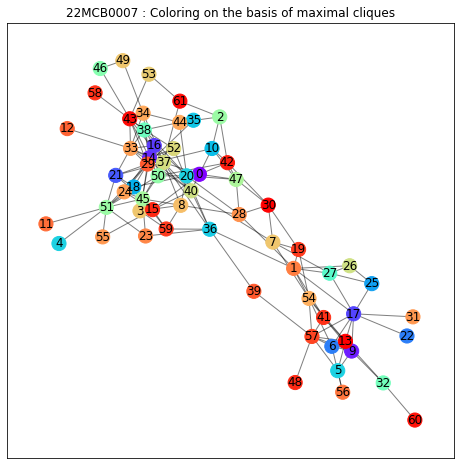

In [26]:
# Identify maximal cliques in the graph
maximal_cliques = list(nx.find_cliques(G))
# Create a dictionary to store the community colors
community_colors = {}
# Assign a different color to each community
for i, clique in enumerate(maximal_cliques):
 for node in clique:
    community_colors[node] = i
# Visualization
pos = nx.spring_layout(G) # Positioning of nodes for visualization
# Draw the graph with community colors
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_color=list(community_colors.values()), cmap='rainbow',vmin=None, vmax=None, ax=None, linewidths=None, edgecolors=None, label=None, margins=None,node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title('22MCB0007 : Coloring on the basis of maximal cliques')
#plt.colorbar(label='Community Index')
plt.show()

In [27]:
def find_communities_from_cliques(cliques, overlap_threshold):
 # Step 1: Build a clique graph
 clique_graph = nx.Graph()
 for i, clique1 in enumerate(cliques):
    for j, clique2 in enumerate(cliques):
        if i != j and len(set(clique1) & set(clique2)) >= overlap_threshold:
           clique_graph.add_edge(i, j)

 # Step 2: Find connected components
 communities = list(nx.connected_components(clique_graph))
 return communities

# Example usage
# Provide a list of cliques identified by the clique percolation method
cliques = list(nx.find_cliques(G))

# Set the overlap threshold
overlap_threshold = 2

# Find communities from cliques
communities = find_communities_from_cliques(cliques, overlap_threshold)

# Print the identified communities
for i, community in enumerate(communities):
 print(f"Community {i+1}: {community}")

Community 1: {1, 4, 61, 46}
Community 2: {2, 3, 11, 13, 14, 17, 18, 23, 24, 29}
Community 3: {66, 6, 19, 55, 25, 62}
Community 4: {20, 21, 22, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 50, 51, 53, 54, 56, 57, 58, 59, 69, 74}


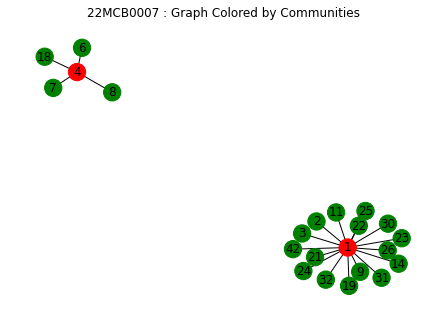

In [45]:
# Create an example graph using NetworkX
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 9), (1, 11), (1, 14), (1, 19),(1,30),(1,42),
                  (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 30), (1,31), (1,32),
                  (4, 6), (4, 7), (4, 8), (4, 18)])

# Define the node categories dictionary
node_categories = {'Community 1': [1, 4, 61, 46],
                   'Community 2': [2, 3, 11, 13, 14, 17, 18, 23, 24, 29],
                   'Community 3': [66, 6, 19, 55, 25, 62],
                   'Community 4': [20, 21, 22, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 50, 51, 53, 54, 56, 57, 58, 59, 69, 74]}

# Define the node colors based on categories
node_colors = {node: 'red' if node in node_categories['Community 1'] else 'green' for node in G.nodes()}

# Visualization
pos = nx.spring_layout(G)  # Positioning of nodes for visualization

# Draw the graph with node colors
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()], cmap='rainbow', node_size=300)
plt.title('22MCB0007 : Graph Colored by Communities')
plt.show()


G.remove_edges_from(nx.selfloop_edges(G)

In [33]:
# Apply Girvan-Newman Algorithm
def girvan_newman(G):
    # Create a copy of the original graph
    G_copy = G.copy()

    # Check if the graph is connected
    if not nx.is_connected(G_copy):
        return []

    # Store the initial number of connected components
    initial_components = nx.number_connected_components(G_copy)

    # List to store the detected communities
    communities = []

    while True:
        # Calculate the edge betweenness centrality
        edge_betweenness = nx.edge_betweenness_centrality(G_copy)

        # Check if the edge_betweenness dictionary is empty
        if not edge_betweenness:
            break

        # Find the edge(s) with the highest betweenness centrality
        max_betweenness = max(edge_betweenness.values())
        max_betweenness_edges = [edge for edge, betweenness in edge_betweenness.items() if betweenness == max_betweenness]

        # Remove the edge(s) with the highest betweenness centrality
        G_copy.remove_edges_from(max_betweenness_edges)

        # Calculate the number of connected components after removing the edge(s)
        current_components = nx.number_connected_components(G_copy)

        # Check if the number of connected components has increased
        if current_components > initial_components:
            # Store the detected communities
            communities = list(nx.connected_components(G_copy))
            # Break the loop if all communities are found
            if len(communities) == initial_components:
                break

    return communities

In [34]:
# Detect communities using Girvan-Newman algorithm
detected_communities = girvan_newman(G)

In [35]:
# Convert the detected communities to a valid partition format
partition = [list(community) for community in detected_communities]

In [36]:
# Calculate the total number of nodes
total_nodes = G.number_of_nodes()

# Calculate the total number of communities
total_communities = len(partition)

print("Total Number of Nodes:", total_nodes)
print("Total Number of Communities:", total_communities)


Total Number of Nodes: 62
Total Number of Communities: 62


In [37]:
print("Detected Communities:")
for i, community in enumerate(partition):
    print(f"Community {i + 1}:")
    print("Number of nodes:", len(community))
    print("Nodes:", community)
    print()   

Detected Communities:
Community 1:
Number of nodes: 1
Nodes: [0]

Community 2:
Number of nodes: 1
Nodes: [1]

Community 3:
Number of nodes: 1
Nodes: [2]

Community 4:
Number of nodes: 1
Nodes: [3]

Community 5:
Number of nodes: 1
Nodes: [4]

Community 6:
Number of nodes: 1
Nodes: [5]

Community 7:
Number of nodes: 1
Nodes: [6]

Community 8:
Number of nodes: 1
Nodes: [7]

Community 9:
Number of nodes: 1
Nodes: [8]

Community 10:
Number of nodes: 1
Nodes: [9]

Community 11:
Number of nodes: 1
Nodes: [10]

Community 12:
Number of nodes: 1
Nodes: [11]

Community 13:
Number of nodes: 1
Nodes: [12]

Community 14:
Number of nodes: 1
Nodes: [13]

Community 15:
Number of nodes: 1
Nodes: [14]

Community 16:
Number of nodes: 1
Nodes: [15]

Community 17:
Number of nodes: 1
Nodes: [16]

Community 18:
Number of nodes: 1
Nodes: [17]

Community 19:
Number of nodes: 1
Nodes: [18]

Community 20:
Number of nodes: 1
Nodes: [19]

Community 21:
Number of nodes: 1
Nodes: [20]

Community 22:
Number of nodes: 

In [38]:
# Calculate metrics for each community
for i, community in enumerate(partition):
    print(f"Community {i + 1}:")
    print("Number of nodes:", len(community))
    print("Modularity:", modularity(G, partition))
    cut = nx.cut_size(G, community, G.nodes)
    volume = nx.volume(G, community)
    conductance = cut / (2 * volume)
    print("Conductance:", conductance)
    print()

Community 1:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 2:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 3:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 4:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 5:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 6:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 7:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 8:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 9:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 10:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 11:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

Community 12:
Number of nodes: 1
Modularity: -0.02139946995767575
Conductance: 0.5

C

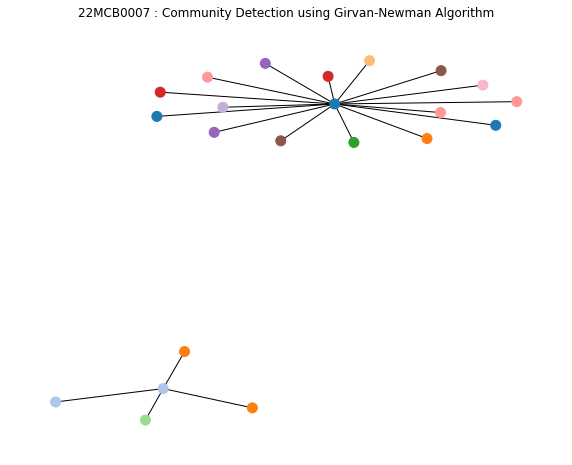

In [46]:
import matplotlib.cm as cm

# Visualize the communities
pos = nx.spring_layout(G)  # Positioning of nodes

# Get the number of communities
num_communities = len(detected_communities)

# Initialize the colormap
cmap = cm.get_cmap('tab20', num_communities)

plt.figure(figsize=(10, 8))
for i, community in enumerate(detected_communities):
    community_name = f"Community {i+1}"
    for node in community:
        node_colors[node] = cmap(i)

nx.draw_networkx(G, pos, with_labels=False, node_color=[node_colors[node] for node in G.nodes()], node_size=100)
plt.title('22MCB0007 : Community Detection using Girvan-Newman Algorithm')
plt.axis('off')
plt.show()
